In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


In [2]:
# Load the dataset
data = pd.read_csv('Mall_Customers.csv')
print(data.head())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [3]:
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]


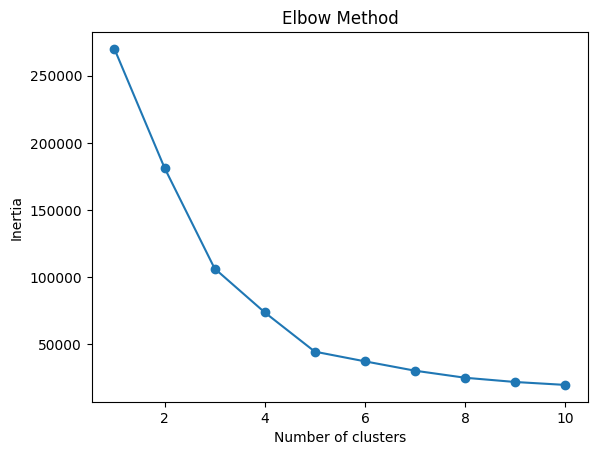

In [4]:
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the results
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


In [5]:
# Choose optimal number of clusters, e.g., 5
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X)

# Get cluster labels
data['Cluster'] = kmeans.labels_


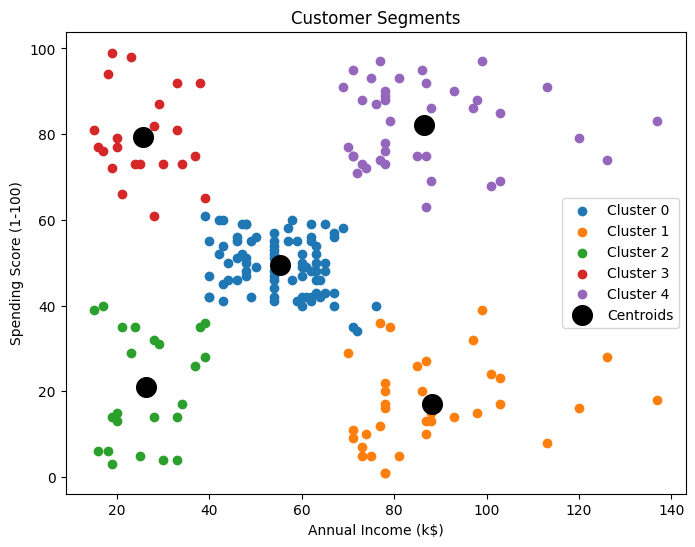

In [6]:
plt.figure(figsize=(8, 6))
for i in range(5):  # Change 5 to the number of clusters you selected
    plt.scatter(X[data['Cluster'] == i]['Annual Income (k$)'],
                X[data['Cluster'] == i]['Spending Score (1-100)'],
                label=f'Cluster {i}')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='black', label='Centroids')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segments')
plt.legend()
plt.show()
